In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
codetrace = "/home/franlucc/projects/codetrace"
os.environ["PYTHONPATH"] = codetrace
sys.path.append(codetrace)

In [6]:
os.environ["PYTHONHASHSEED"] = "42"
from codetrace.analysis.plot_fig_icl import _load, compare_icl, plot_icl

In [5]:
df, df_icl = _load("/mnt/ssd/franlucc/scratch/type-steering-results", 5, f"{codetrace}/results")

Loading from local: True


Loading models data:   0%|          | 0/5 [00:00<?, ?it/s]

Loading Test Split Success: 100%|██████████| 1876/1876 [00:00<00:00, 7380.39it/s]


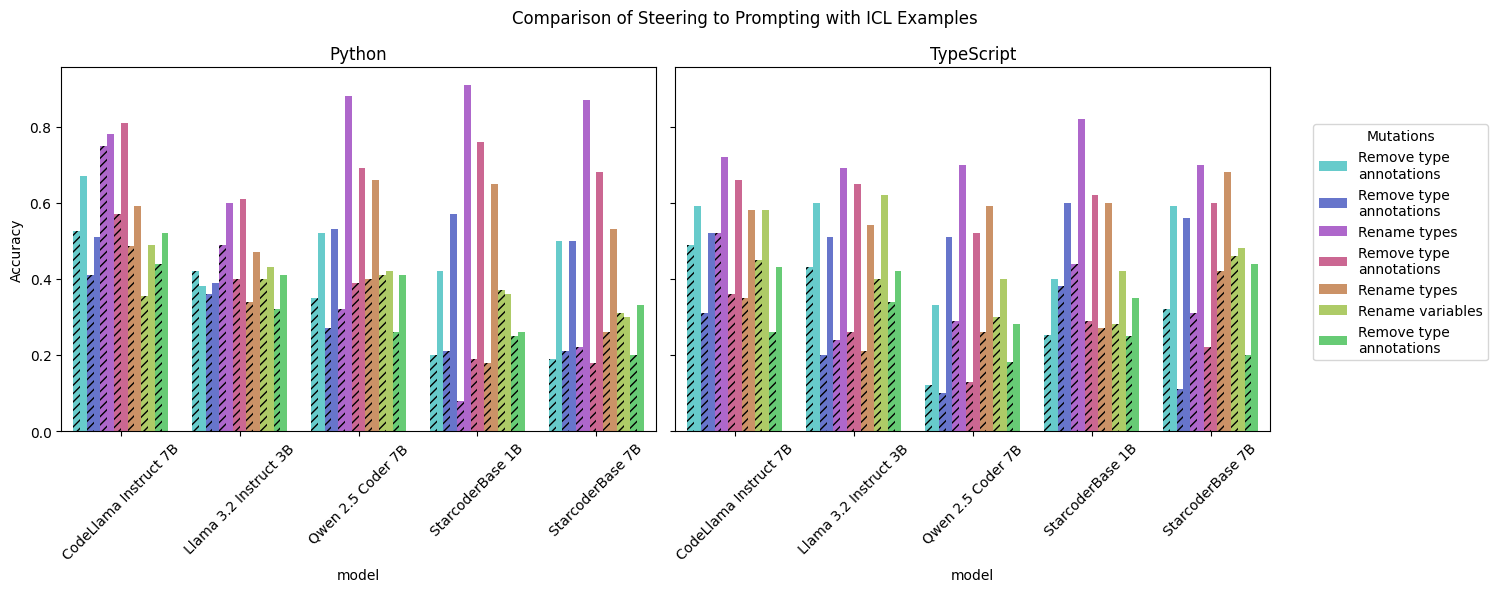

In [10]:
df = compare_icl(df, df_icl, f"{codetrace}/codetrace/analysis/figures/compare_icl-interval_5.csv")
plot_icl(df, f"{codetrace}/codetrace/analysis/figures/compare_icl-interval_5.pdf")
